In [18]:
import pandas as pd
import matplotlib.pyplot as plt


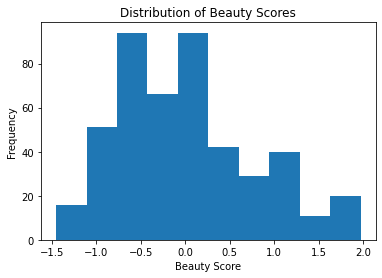

Tenure Count:
   gender  tenured_prof  percentage
0  female           145   40.166205
1    male           216   59.833795

Descriptive Stats by Gender:
   gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

Question 1:
Percentage of visible minorities among tenure professors: 14.96%
Conclusion: Analyze if tenure status differs for teachers who are visible minorities.

Question 2:
  tenure        age           
               mean        std
0     no  50.186275   6.946372
1    yes  47.850416  10.420056

Question 3:


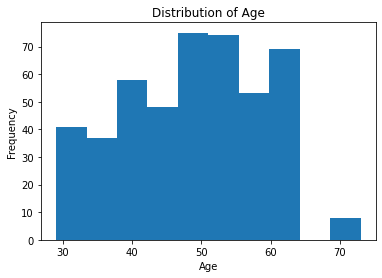


Question 4:


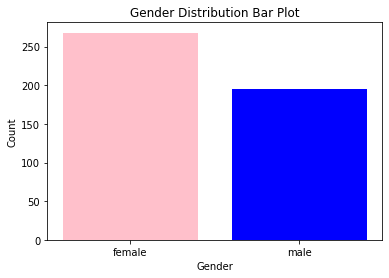


Question 5:
Median evaluation score for tenured professors: 4.0


In [39]:
def stats(file_loc):
    # Read Data
    df = pd.read_csv(file_loc)

    # Descriptive stats
    student_mean = df['students'].mean()
    student_median = df['students'].median()
    student_mode = df['students'].mode()
    student_min = df['students'].min()
    student_max = df['students'].max()

    # Plot histogram
    plt.hist(df['beauty'])
    plt.xlabel('Beauty Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of Beauty Scores')
    plt.show()

    # Tenure
    tenure_count = df[df.tenure == 'yes'].groupby('gender').agg({'tenured_prof': 'count'}).reset_index()
    tenure_count['percentage'] = 100 * tenure_count.tenured_prof / tenure_count.tenured_prof.sum()

    print("Tenure Count:")
    print(tenure_count)

    # Descriptive stats by gender
    gender_stats = df.groupby('gender').agg({'beauty': ['mean', 'std', 'var']}).reset_index()

    print("\nDescriptive Stats by Gender:")
    print(gender_stats)

    # Practice Questions
    # Question 1: Calculate the percentage of visible minorities who are tenure professors.
    visible_minority_tenure_count = df[(df.tenure == 'yes') & (df.vismin == 1)].shape[0]
    total_tenure_count = df[df.tenure == 'yes'].shape[0]
    percentage_visible_minority_tenure = (visible_minority_tenure_count / total_tenure_count) * 100

    print("\nQuestion 1:")
    print(f"Percentage of visible minorities among tenure professors: {percentage_visible_minority_tenure:.2f}%")
    print("Conclusion: Analyze if tenure status differs for teachers who are visible minorities.")

    # Question 2: Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.
    age_by_tenure = df.groupby('tenure').agg({'age': ['mean', 'std']}).reset_index()
    print("\nQuestion 2:")
    print(age_by_tenure)

    # Question 3: Create a histogram for the age variable.
    print("\nQuestion 3:")
    plt.hist(df['age'])
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Distribution of Age')
    plt.show()

    # Question 4: Create a bar plot for the gender variable.
    print("\nQuestion 4:")
    plt.bar(df.gender.unique(), df.gender.value_counts(), color=['pink', 'blue'])
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title('Gender Distribution Bar Plot')
    plt.show()

    # Question 5: What is the Median evaluation score for tenured Professors?
    median_eval_tenured = df[df['tenure'] == 'yes']['eval'].median()
    print("\nQuestion 5:")
    print(f"Median evaluation score for tenured professors: {median_eval_tenured}")

# Specify the correct file path
file_loc = 'teachingratings.csv'
# Call the stats function
stats(file_loc)
